# MARATÓN BEHIND THE CODE 2021

# Desafío 02 Parte 2 - Predicción con datos de IoT | Quanam

En un centro de rehabilitación de salud, existen instalados sensores para determinar la calidad de las condiciones ambientales. Se necesita tener control de la calidad del aire y otros parámetros relativos al ambiente, para actuar rápidamente si se detectaran anomalías, ya que las mismas podrían ser muy perjudiciales para los pacientes.

Los sensores están instalados en ubicaciones diversas como: sala de espera, habitaciones, baños, comedor, sala de actividades, oficina, jardín.

Los niveles aceptables de los datos medidos pueden variar según la ubicación del medidor.

Así mismo, en los horarios de visita, los niveles aceptables podrán variar (se asume que podrá haber más contaminación).

Adicionalmente, se cuenta con pulseras que miden el ritmo cardíaco colocadas en pacientes con enfermedades o riesgos cardíacos. El propósito es poder controlar y realizar intervenciones tempranas en pacientes que sufran una descomposición en estos valores.

En la oficina, hay un servidor disponible para el monitoreo de los parámetros medidos, para poder visualizar los niveles de los mismos.

Se requiere desarrollar una solución de software, que lea los datos de los sensores, los evalúede acuerdo a los parámetros establecidos y genere alarmas cuando los datos salgan de los rangos permitidos.
<hr>


## Captura de Datos

Para este desafío, tenemos un broker MQTT disponible online. Este broker está capturando datos de sensores de IoT en un loop y publicándolos en el tema quanam, y usted debería capturarlos. En total, hay 3200 muestras de datos diferentes, cada una con los valores de co2 (CO2), temperatura (TEMP), humedad (HUMID), sonido (SOUND), iluminación (ILLUM ) y ritmo cardíaco (RYTHM), junto con un número de identificación de muestra (ID), que va de 1 a 3200. El primer paso que debe completar es capturar estos datos del broker y luego hacer un análisis con ellos. 

In [ ]:
!pip install paho-mqtt


     |████████████████████████████████| 99 kB 4.1 MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.6.1-py3-none-any.whl size=62133 sha256=b2c3251fbedb46a18f61c183a784e50b9096b751e6e0e45e119d99fb08832e09
  Stored in directory: /root/.cache/pip/wheels/d0/bf/ac/2b3f43f8c6fcd0f4ba5395397458c521eb0b52d33b574a5a40
Successfully built paho-mqtt


In [ ]:
import paho.mqtt.client as mqtt
import json
import pandas as pd

DATA_TO_COLLECT = 3200
data = []

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))

    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    client.subscribe("quanam")

# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))
    msg_dict=json.loads(msg.payload)
    data.append(msg_dict)
    if len(data) >= DATA_TO_COLLECT:
      client.disconnect()

def on_disconnect(client, userdata, rc):
  df = pd.DataFrame(data)

  # Reordeno las columnas, para dejar ID como primera.
  cols = df.columns.tolist()
  cols = cols[-1:] + cols[:-1]
  df = df[cols]

  df.sort_values(by=['ID'], inplace=True)

  df.to_csv("data.csv", index=False)
  df.info()


client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.on_disconnect = on_disconnect

client.username_pw_set(username="maratoners", password="btc-2021")

client.connect(host="iot.maratona.dev", port=31666, keepalive=60)

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
client.loop_forever()

Connected with result code 0
quanam b'{"ILLUM": "384.28", "HUMID": "64.07", "CO2": "453.65", "SOUND": "16.25", "TEMP": "19.85", "RYTHM": "65.16", "ID": 1763}'
quanam b'{"ILLUM": "428.0", "HUMID": "62.26", "CO2": "505.49", "SOUND": "38.94", "TEMP": "18.2", "RYTHM": "77.04", "ID": 1764}'
quanam b'{"ILLUM": "273.79", "HUMID": "63.45", "CO2": "543.28", "SOUND": "37.23", "TEMP": "20.6", "RYTHM": "80.57", "ID": 1765}'
quanam b'{"ILLUM": "547.1", "HUMID": "70.32", "CO2": "433.33", "SOUND": "27.3", "TEMP": "19.95", "RYTHM": "71.25", "ID": 1766}'
quanam b'{"ILLUM": "514.43", "HUMID": "63.69", "CO2": "484.7", "SOUND": "29.95", "TEMP": "17.53", "RYTHM": "75.54", "ID": 1767}'
quanam b'{"ILLUM": "348.05", "HUMID": "68.38", "CO2": "542.82", "SOUND": "21.86", "TEMP": "22.73", "RYTHM": "84.01", "ID": 1768}'
quanam b'{"ILLUM": "326.27", "HUMID": "61.69", "CO2": "456.58", "SOUND": "35.25", "TEMP": "22.14", "RYTHM": "79.97", "ID": 1769}'
quanam b'{"ILLUM": "433.37", "HUMID": "66.09", "CO2": "518.45", "SO

7

## Exploración de los datos


In [7]:
import pandas as pd

df = pd.read_csv(r'data.csv')

### Relacion entre Features

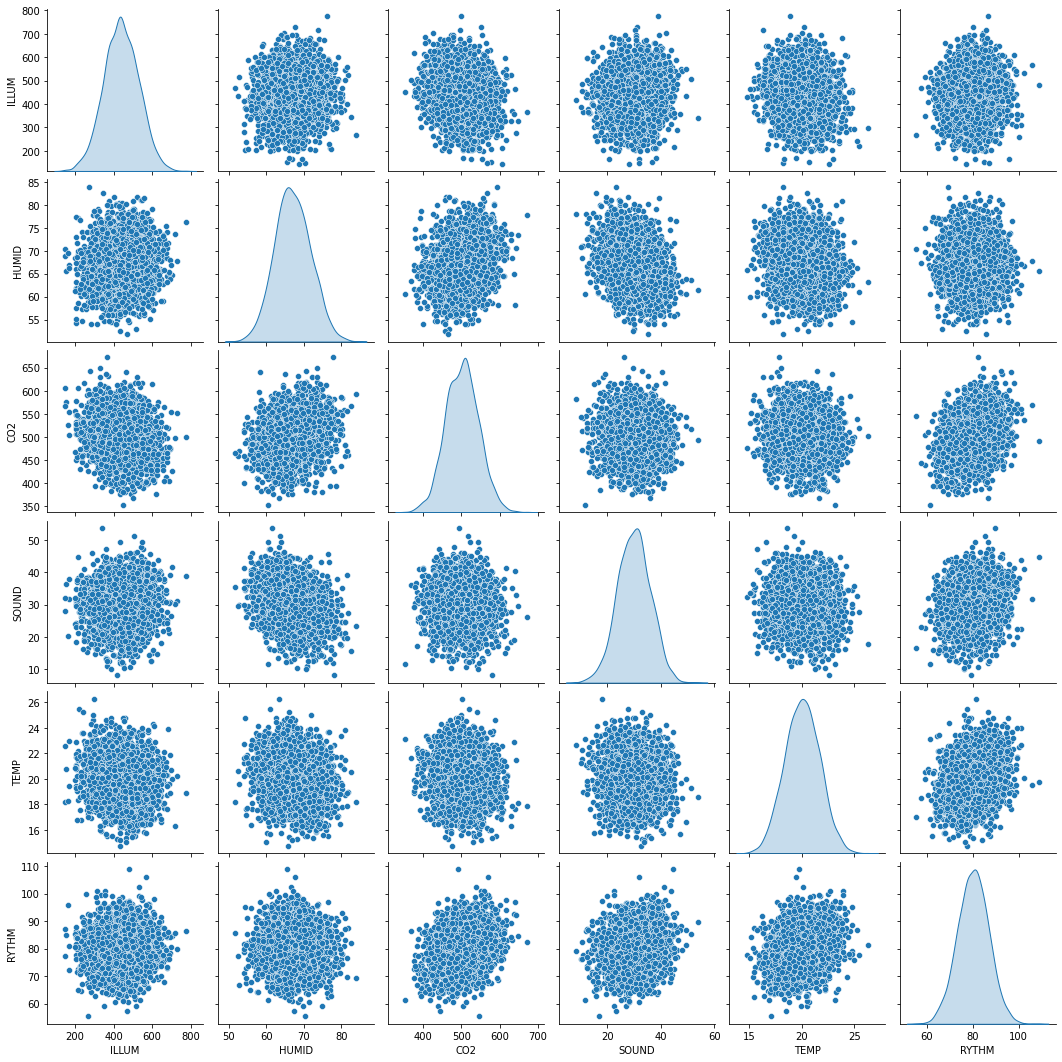

In [8]:
import seaborn as sns
%matplotlib inline

sns.pairplot(df.drop(['ID'], axis=1), diag_kind="kde")

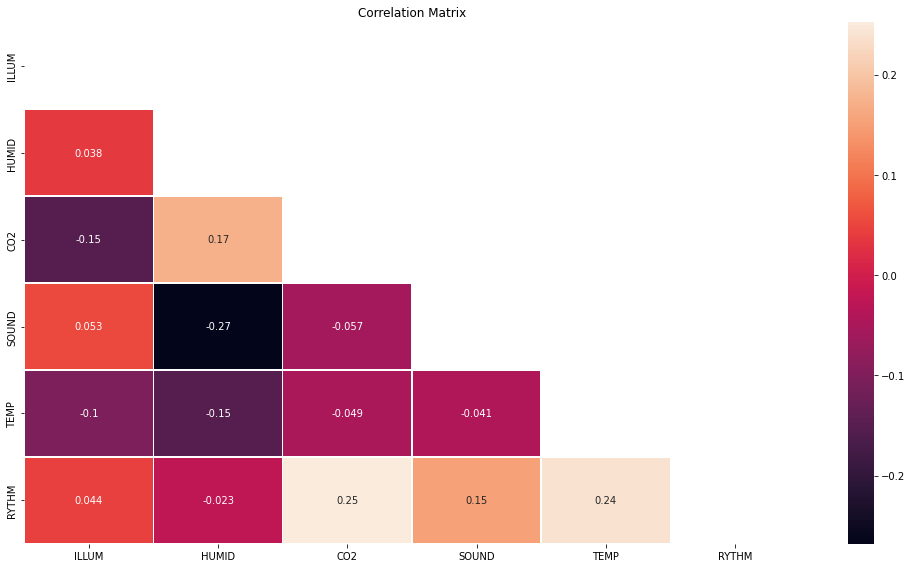

In [9]:
# HeatMap
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize = (14, 8))
mask = np.triu(np.ones_like(df.drop(columns=['ID']).corr(), dtype=bool))

sns.heatmap(round(df.drop(columns=['ID']).corr(method = 'spearman'), 3), mask=mask,annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Relacion de Target vs Features (Tendencia)

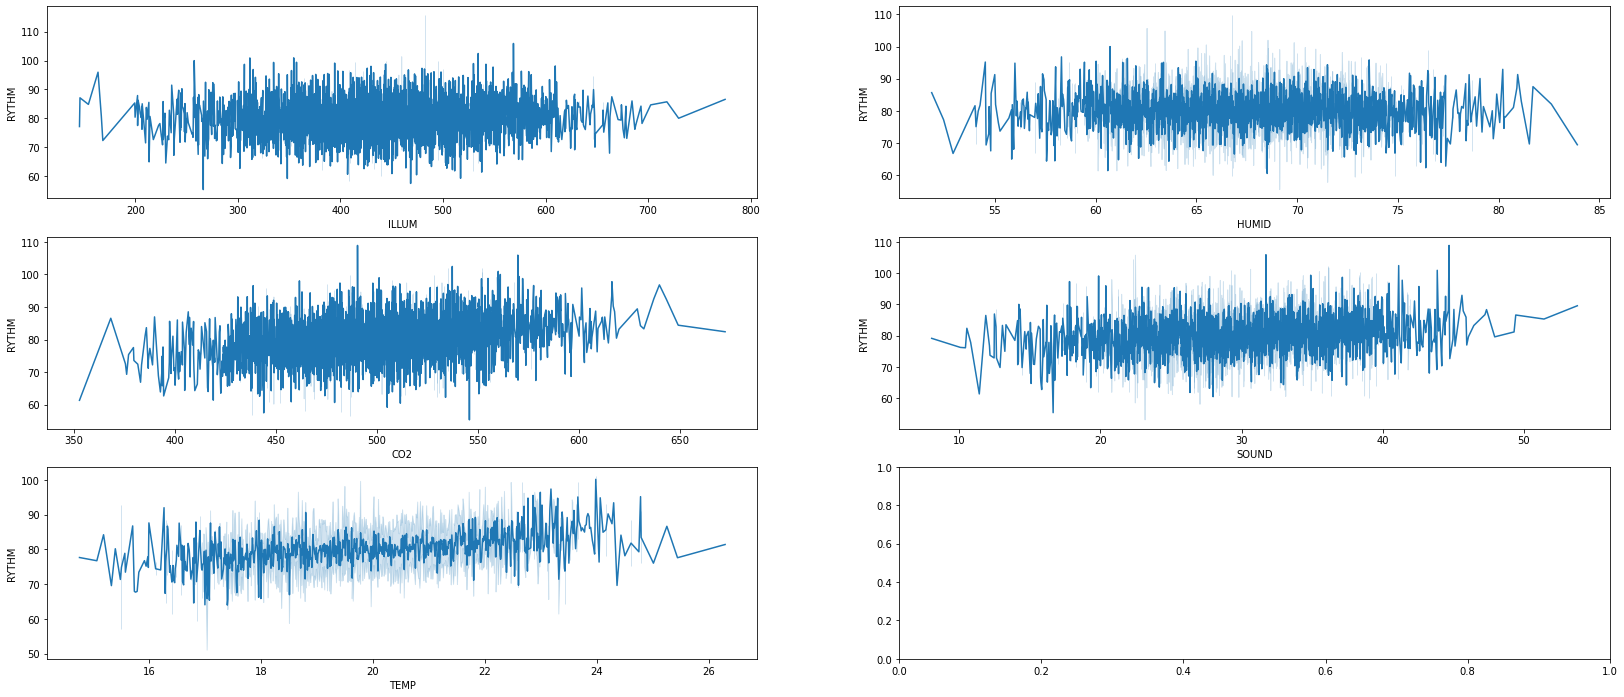

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(28, 12))

sns.lineplot(x="ILLUM", y="RYTHM",err_style="band", 
             ci='sd', estimator="mean", data=df, ax=axes[0][0])
sns.lineplot(x="HUMID", y="RYTHM", err_style="band", 
             ci='sd', estimator="mean", data=df, ax=axes[0][1])
sns.lineplot(x="CO2", y="RYTHM", err_style="band", 
             ci='sd', estimator="mean", data=df, ax=axes[1][0])

sns.lineplot(x="SOUND", y="RYTHM",err_style="band", 
             ci='sd', estimator="mean", data=df, ax=axes[1][1])
sns.lineplot(x="TEMP", y="RYTHM", err_style="band", 
             ci='sd', estimator="mean", data=df, ax=axes[2][0])


### Distribución de las variables

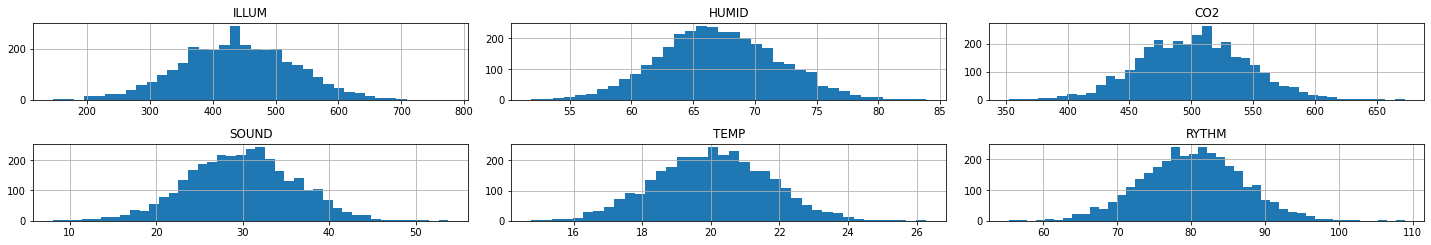

In [11]:
# easy way to plot all numeric columns
df.drop(columns=['ID']).hist(figsize = (20, 10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

## Procesamiento de datos y Entrenamiento de Modelo

In [12]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

def evaluate_model(model, X, y, repeats):
  # prepare the cross-validation procedure
  cv = RepeatedKFold(n_splits=2, n_repeats=repeats)
  # evaluate model
  scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
  print('Mean r2: %.3f (%.3f)' % (mean(scores), std(scores)))
  return scores

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor, BernoulliRBM
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer,  RobustScaler, QuantileTransformer
from sklearn.decomposition import PCA

# Defino pipeline de pre-procesamiento
my_pipeline = Pipeline([
                        ('scaler', StandardScaler()),
                        ('model', MLPRegressor(hidden_layer_sizes=(200,100,15)))
                        #('model', SVR())
                        ])


# Separo Features y Target
features = ['ILLUM', 'CO2', 'SOUND', 'TEMP']
target = ['RYTHM']

X = df[features]
y = df[target]

In [14]:
print("Metricas Sin remover columnas")
evaluate_model(my_pipeline, X, y, 5)

for c in (X.columns):
    print("Metricas removiendo: {}".format(c))
    X_rm = X.drop(c, axis=1, inplace=False)
    
    evaluate_model(my_pipeline, X_rm, y, 5)

Metricas Sin remover columnas
Mean r2: 0.167 (0.009)
Metricas removiendo: ILLUM
Mean r2: 0.168 (0.017)
Metricas removiendo: CO2
Mean r2: 0.078 (0.008)
Metricas removiendo: SOUND
Mean r2: 0.144 (0.013)
Metricas removiendo: TEMP
Mean r2: 0.090 (0.016)


#### Entrenamiento final con todo el dataset

In [17]:
from sklearn.metrics import r2_score
my_pipeline.fit(X, y)
print("R^2 dataset: {}".format(r2_score(y, my_pipeline.predict(X))))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 dataset: 0.22073950714089996


## Predicción de valores

In [18]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev/desafio-2-2021/main/assets/answers.csv
df_to_be_scored = pd.read_csv(r'answers.csv')
df_to_be_scored.tail()

--2021-11-25 13:19:48--  https://raw.githubusercontent.com/maratonadev/desafio-2-2021/main/assets/answers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31556 (31K) [text/plain]
Saving to: ‘answers.csv’

answers.csv         100%[===================>]  30.82K  --.-KB/s    in 0.002s  

2021-11-25 13:19:48 (13.6 MB/s) - ‘answers.csv’ saved [31556/31556]



,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
795,795,421.39,55.97,451.86,29.25,18.96,0.0
796,796,572.90,59.42,502.12,36.12,19.70,0.0
797,797,460.78,64.28,560.54,31.20,15.11,0.0
798,798,499.75,67.20,536.88,30.68,17.57,0.0
799,799,453.78,58.24,442.83,26.21,20.58,0.0


In [19]:
features_to_be_scored  = df_to_be_scored[features]

y_pred = my_pipeline.predict(features_to_be_scored)
df_to_be_scored['RYTHM'] = y_pred
df_to_be_scored.tail()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
795,795,421.39,55.97,451.86,29.25,18.96,75.678080
796,796,572.90,59.42,502.12,36.12,19.70,82.192525
797,797,460.78,64.28,560.54,31.20,15.11,79.353993
798,798,499.75,67.20,536.88,30.68,17.57,79.102091
799,799,453.78,58.24,442.83,26.21,20.58,76.300460


In [20]:
df_to_be_scored.to_csv(path_or_buf='answers.csv', index=False)